### Quantum Tree Search - example 

Two different modes of traversing the tree are present at the moment

* mode = "depth" - Algorithm tries to find goal state in a given depth defined by the user.
* mode = "iterative deepning" - Algorithm tries to find the goal state at each level of the tree iteratively.
  

In [2]:
from qTreeSearch import quantumTreeSearch as QTS

Example of a transition kernel representing the tree

In [3]:
from executeCircuit import execute_circuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
states=9
actions=4
action_set=list(range(actions))

transition_kernel= np.zeros(states,dtype=object)
steps = 1

#action, sprime
transition_kernel[0] = [(0,1),(1,2),(2,3)]
transition_kernel[1] = [(1,4) , (3,5)]
transition_kernel[2] = []
transition_kernel[3] = [(1,6),(2,7),(3,8)]

for i in range(4,states):
	transition_kernel[i] = []

Defining the quantum tree 

In [5]:
qts = QTS(tree=transition_kernel, n_states=states, action_set=action_set)

Traverse the tree in mode="depth"

In [6]:
q_tree = qts.traverse(depth=2, mode="depth")

Measure the sequence of actions that lead to the goal state

In [7]:
counts, actions = qts.measure(goal_state=7, iterations=None, shots=1024)

/opt/homebrew/Caskroom/miniforge/base/envs/quantum_DS/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniforge/base/envs/quantum_DS/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


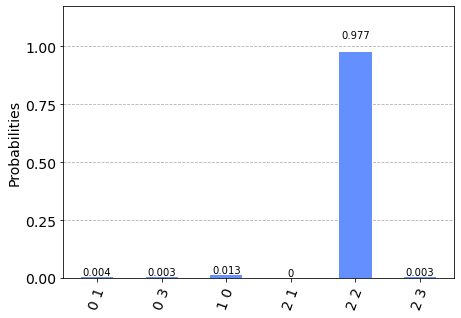

In [8]:
plot_histogram(counts)


The same example but in iterative deepning 

In [5]:
qts = QTS(tree=transition_kernel, n_states=states, action_set=action_set)

q_tree = qts.traverse(mode="iterative_deepning")


In [6]:
counts, actions, depth = qts.measure(goal_state=7, iterations=None)


/opt/homebrew/Caskroom/miniforge/base/envs/quantum_DS/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniforge/base/envs/quantum_DS/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


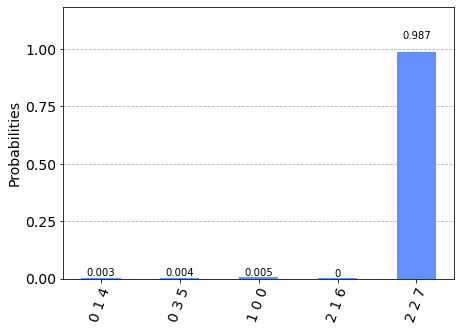

In [7]:
plot_histogram(counts)